<h1 style="color:red">RANDOM FOREST REGRESSION MODEL</h1>

In [40]:
import pandas as pd
import numpy as np

In [41]:
housing=pd.read_csv(r"C:\Users\91964\Downloads\housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h2 style="color:blue">DATA CLEANING</h2>


In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [43]:
housing.isna().sum() #check missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [44]:
housing["total_bedrooms"]=housing["total_bedrooms"].fillna(housing["total_bedrooms"].mean())
housing.isna().sum()                                                         

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [45]:
housing.duplicated().sum()

np.int64(0)

In [46]:
housing["ocean_proximity"].unique() #finding unique values

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [47]:
housing['ocean_proximity']=housing['ocean_proximity'].map({'NEAR BAY':4,'<1H OCEAN':2,'INLAND':1,'NEAR OCEAN':3,'ISLAND':5})

In [48]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1


<h1 style="color:red">DATA ANALYSIS </h1>


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,-0.271730
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,0.007695
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.295012
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.031586
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,-0.009970
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,-0.039415
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.012873
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.163755
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.397251
ocean_proximity,-0.271730,0.007695,0.295012,-0.031586,-0.009970,-0.039415,0.012873,0.163755,0.397251,1.000000


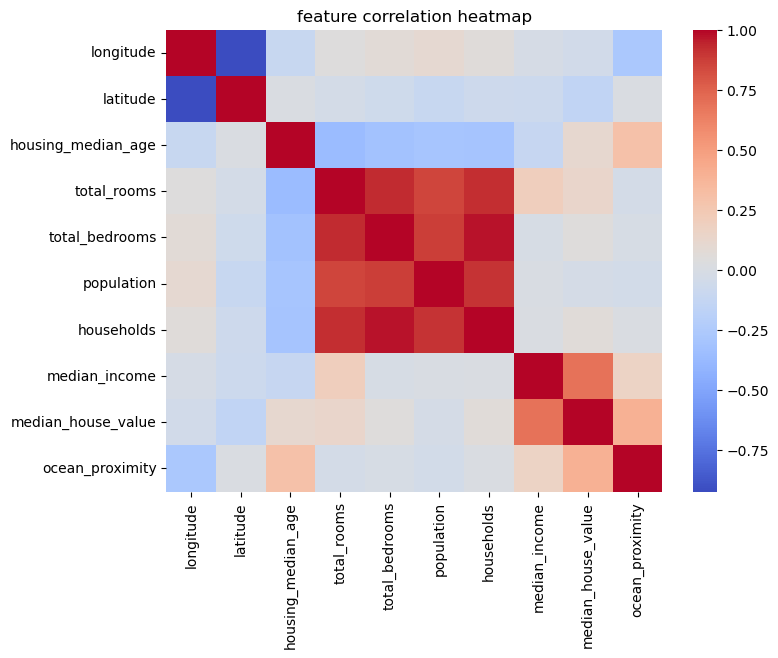

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(housing.corr(),cmap="coolwarm")
plt.title("feature correlation heatmap")
plt.show()

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

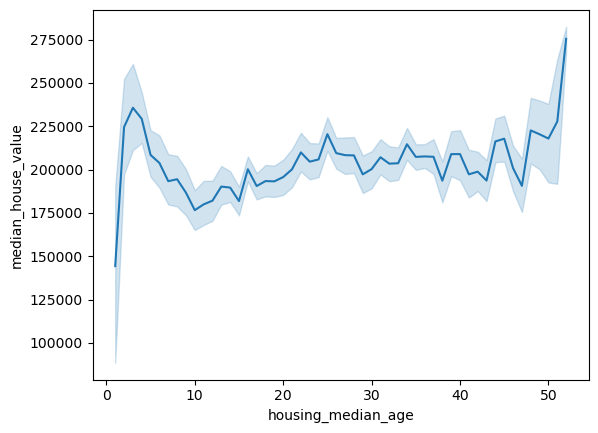

In [59]:

sns.lineplot(data=housing,x='housing_median_age',y='median_house_value')  

<Axes: xlabel='median_house_value', ylabel='Count'>

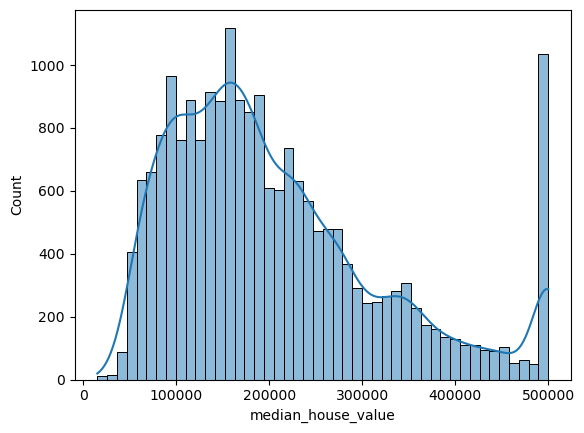

In [68]:
sns.histplot(housing['median_house_value'],kde=True) #kde used for line going true it

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x=housing.drop('median_house_value',axis=1)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,4
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,4
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,4
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,4
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1


In [84]:
y=housing["median_house_value"]
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [111]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

<h2 style="color:red"h1>MODEL BUILDING </h2>

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

In [117]:
model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

<h2 style="color:red"h1>PREDICTION </h2>

In [123]:
y_pred=model.predict(xtest)
y_pred

array([ 54723.  ,  69784.  , 469580.44, ..., 497174.96,  70116.  ,
       167477.  ], shape=(4128,))

In [127]:
sample=xtest.iloc[0:1]
prediction=model.predict(sample)
print("house price=",prediction)


house price= [54723.]


In [125]:
sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812,1


In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE:",mean_absolute_error(ytest,y_pred))
print("MSE:",np.sqrt(mean_squared_error(ytest,y_pred)))
print("R2:",r2_score(ytest,y_pred))

MAE: 31678.057361918607
MSE: 49046.23574871594
R2: 0.8164288187075899


In [138]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

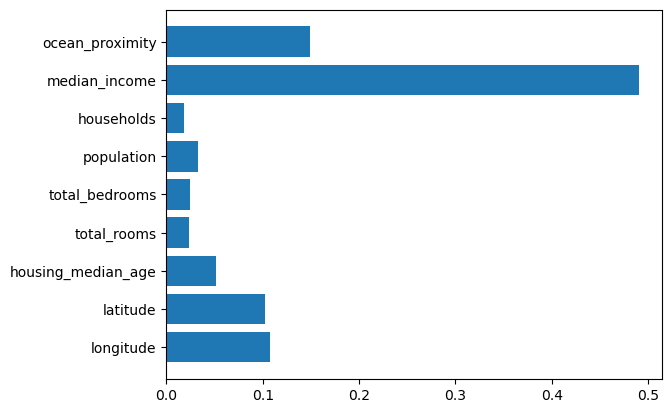

In [142]:
importance=model.feature_importances_
feature=x.columns
plt.barh(feature,importance)